# Esonero 1 - 8 Aprile 2021

Completare i seguenti esercizi tramite uno o più blocchi di codice e descrivendo le operazioni effettuate

### Punteggio Esercizi

    1a: 1
    1b: 1.5
    1c: 2
    1d: 1
    2: 1.5
    3: 1
    4: 1
    5: 1


In [1]:
import numpy as np
from skimage.color import rgb2gray
from scipy.ndimage import convolve

import imageio
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
%matplotlib inline 

def myimshow(I, **kwargs):
    # utility function to show image
    plt.figure();
    plt.axis('off')
    plt.imshow(I, cmap=plt.gray(), **kwargs)

# Esercizio 1

## Filtri di Gabor

Il filtro di Gabor (in forma semplificata) è definito dalla seguente funzione che restituisce due parti (reale e immaginaria)


$$RE_g(x,y,\omega,\theta) = \frac{\omega^2}{4\pi^3}\left[\exp\left\{-(\omega^2/8\pi^2) (4x'^2 + y'^2)\right\}\right]\exp\left(\pi^2/2\right)(\omega x \cos \theta)$$

$$IM_g(x,y,\omega,\theta) = \frac{\omega^2}{4\pi^3}\left[\exp\left\{-(\omega^2/8\pi^2) (4x'^2 + y'^2)\right\}\right]\exp\left(\pi^2/2\right)(\omega x \sin \theta)$$

dove $x' = x \cos \theta + y \sin \theta$ e $y' = y \cos \theta. - x \sin \theta$. L'implementazione è data dal codice sottostante: 

In [2]:
zebra =  rgb2gray(imageio.imread('zebra.jpg'))

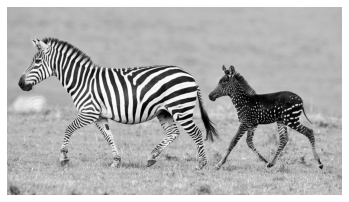

In [3]:
myimshow(zebra)

In [4]:
def genGabor(sz, omega, theta, func=np.cos):
    radius = (int(sz[0]/2.0), int(sz[1]/2.0))
    [x, y] = np.meshgrid(range(-radius[0], radius[0]), range(-radius[1], radius[1]))

    x1 = x * np.cos(theta) + y * np.sin(theta)
    y1 = -x * np.sin(theta) + y * np.cos(theta)
    
    gauss = omega**2 / (4*np.pi**3) * np.exp(- omega**2 / (8*np.pi**2) * ( 4 * x1**2 + y1**2))
    sinusoid = func(omega * x1) * np.exp(np.pi**2 / 2)
    gabor = gauss * sinusoid
    return gabor

`sz` rappresenta la dimensione del filtro, `omega` la frequenza e `theta` l'orientamento.

1. Plottare il filtro per valori a scelta dei parametri

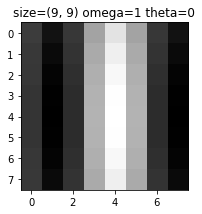

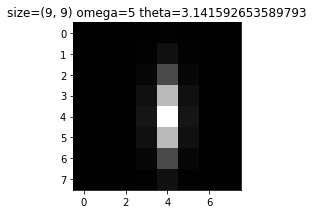

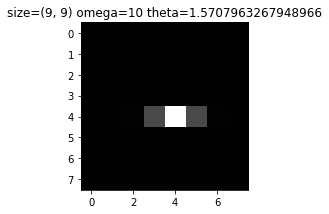

In [24]:
omegas = (1, 5, 10)
thetas = (0, np.pi, np.pi/2)
sz = (9,9)
i = 0
for om,th in zip(omegas,thetas):
    res = genGabor(sz,om,th)
    plt.figure(figsize=(3,5))
    #plt.subplot(3, 1, i := i +1)
    plt.imshow(res)
    plt.title(f'size={sz} omega={om} theta={th}')

## Riflessioni sul filtro di Gabor (1)
Un omega più alto rende il filtro più simile ad un filtro identità
Theta invece rende il filtro di tipo verticale o orizzontale

2. Applicare il filtro di Gabor alla figura della zebra e plottare il risultato. Cosa potete dire del filtro?

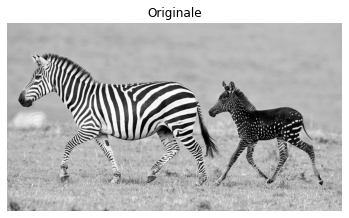

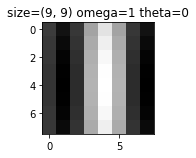

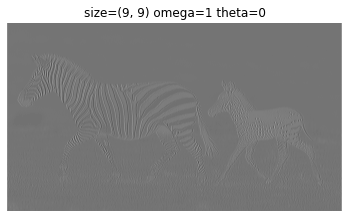

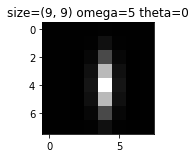

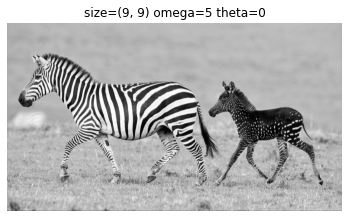

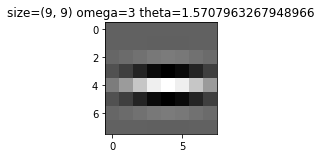

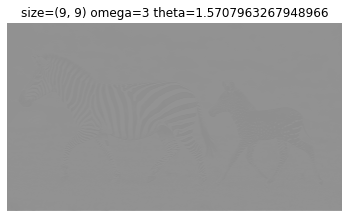

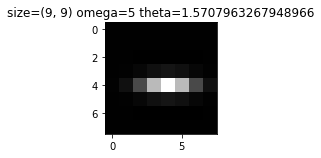

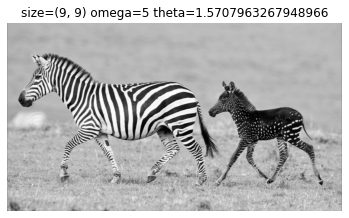

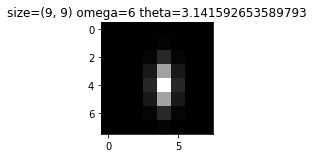

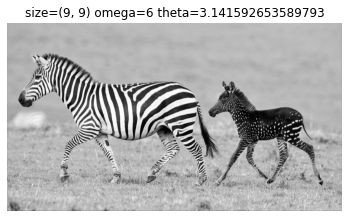

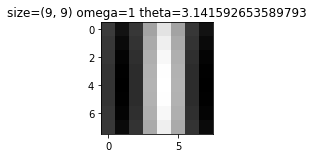

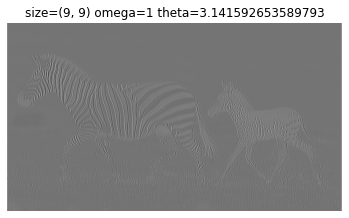

In [43]:
omegas = (1, 5,       3,       5,       6,     1)
thetas = (0, 0,       np.pi/2, np.pi/2, np.pi, np.pi)
sz = (9,9)
myimshow(zebra)
plt.title('Originale')
for om,th in zip(omegas,thetas):
    res = genGabor(sz,om,th)
    filtered = convolve(zebra,res,mode='constant', cval=0.0)
    plt.figure(figsize=(2,4))
    plt.imshow(res)
    plt.title(f'size={sz} omega={om} theta={th}')
    myimshow(filtered)
    plt.title(f'size={sz} omega={om} theta={th}')

## Riflessioni sul filtro di Gabor (2)
Il filtro di Gabor se scelto l'omega corretto tende ad un filtro di tipo passa alto e permette di rilevare o meno le striscie della zebra se il theta, quindi l'orientamento degli assi del filtro è corretto

3. Aggiustare i parametri di ampiezza e rotazione per individuare le strisce verticali. plottare il risultato

Per la seguente immagine _gabor1.jpg_

![](gabor1.jpg)

<ipython-input-67-c0aecec9ae1f>:5: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  gabor1 =  rgb2gray(imageio.imread('gabor1.jpg'))


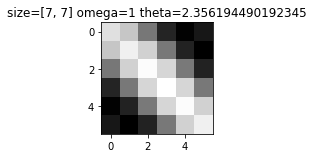

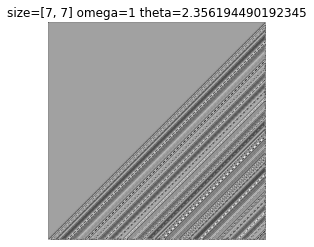

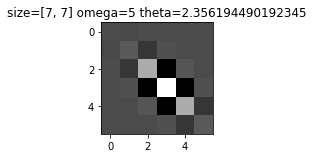

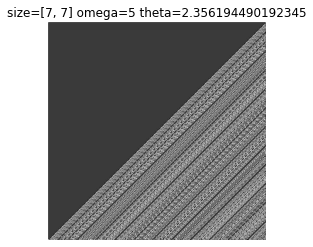

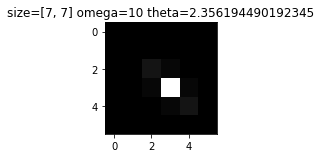

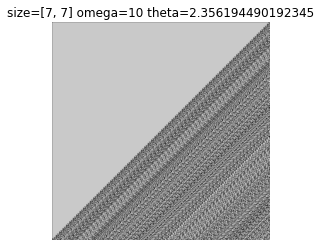

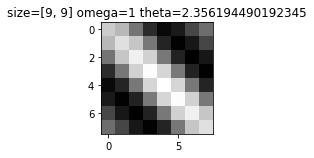

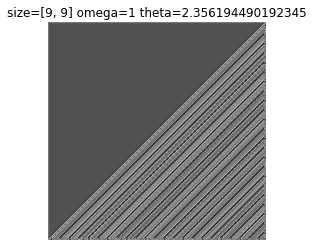

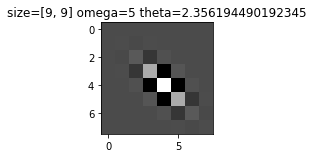

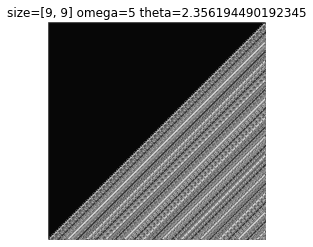

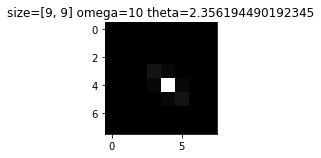

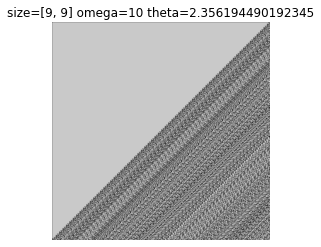

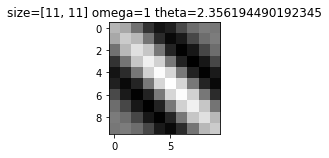

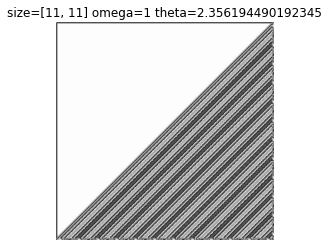

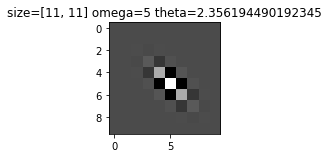

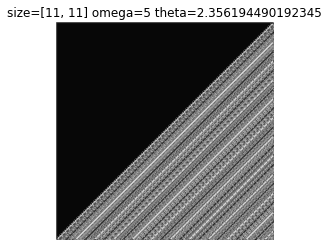

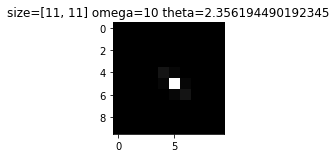

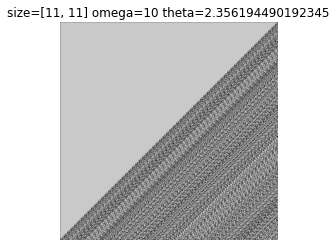

In [67]:
omegas = [1, 5, 10]
thetas = [np.pi/2 + np.pi/4]*3
sizes = (7,9,11)

gabor1 =  rgb2gray(imageio.imread('gabor1.jpg'))
i = 1

for sz in sizes:
    sz = [sz, sz]
    for om,th in zip(omegas,thetas):
        res = genGabor(sz,om,th)
        filtered = convolve(gabor1,res,mode='constant', cval=0.0)
        plt.figure(figsize=(2,4))
        plt.imshow(res)
        plt.title(f'size={sz} omega={om} theta={th}')
        myimshow(filtered)
        plt.title(f'size={sz} omega={om} theta={th}')

4. Qual è il filtro più semplice che permetterebbe di individuare i contorni? Giustificare la risposta

Per rispondere alla domanda, ho testato vari omega e size del filtro, mentre l'orientamento l'ho scelto fisso a 3/4 pi perchè le strisce sono orientate in diagonale.
Il filtro che ha reso più omogenei e chiari i bordi è di grandezza 11x11 con omega 1.
Di conseguenza ho testato altre due differenti size (13 e 15) ed ho notato che il 13x13 con omega 1 si comporta meglio dell'11x11 nel delineare i bordi

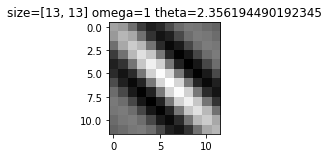

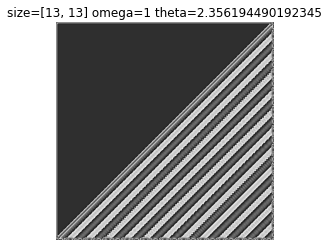

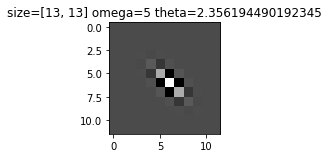

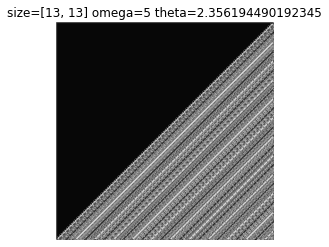

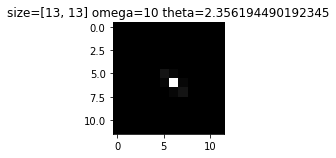

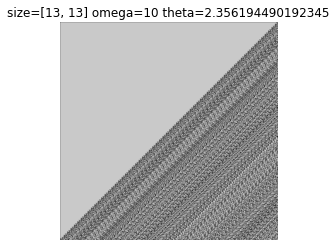

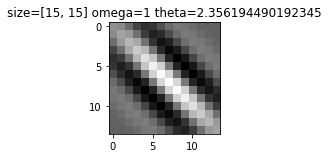

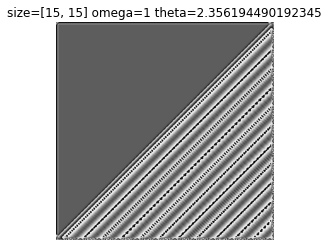

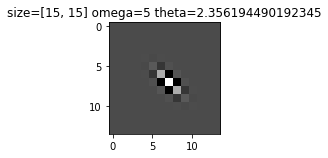

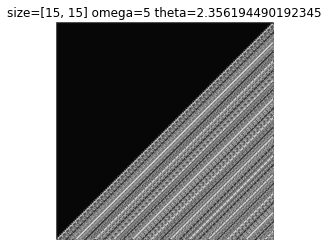

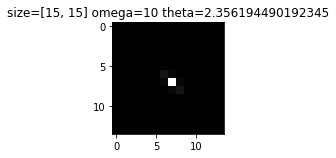

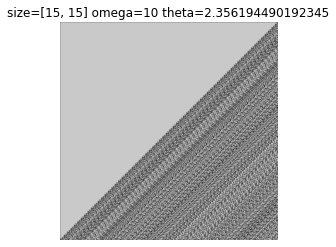

In [68]:
omegas = [1, 5, 10]
thetas = [np.pi/2 + np.pi/4]*3
sizes = (13,15)
for sz in sizes:
    sz = [sz, sz]
    for om,th in zip(omegas,thetas):
        res = genGabor(sz,om,th)
        filtered = convolve(gabor1,res,mode='constant', cval=0.0)
        plt.figure(figsize=(2,4))
        plt.imshow(res)
        plt.title(f'size={sz} omega={om} theta={th}')
        myimshow(filtered)
        plt.title(f'size={sz} omega={om} theta={th}')

# Esercizio 2

Riconoscere il filtro che ha generato questa immagine a partire dall'immagine contenente le forme. Fornire un esempio.

![](filter2.jpg)

# Esercizio 3

Mostrare gli effetti e spiegare cosa succedequando si applica due volte un filtro gaussiano

Data un'immagine _img_ applicare il filtro gaussiano G

img1 = G(G(img))

A cosa equivale questa trasformazione?
Fornire un esempio

Text(0.5, 1.0, 'img')

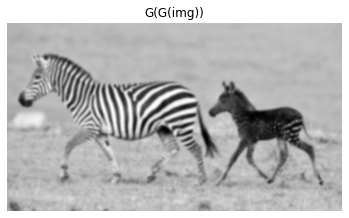

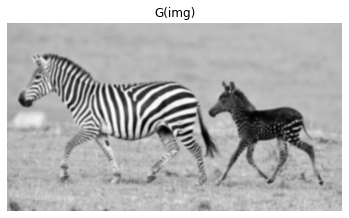

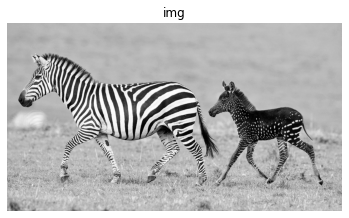

In [93]:
import cv2

zebra =  rgb2gray(imageio.imread('zebra.jpg'))
gimg = cv2.GaussianBlur(zebra, (15, 15), 5)
img1 = cv2.GaussianBlur(gimg, (15, 15), 5)
myimshow(img1)
plt.title('G(G(img))')
myimshow(gimg)
plt.title('G(img)')
myimshow(zebra)
plt.title('img')

## Spiegazione
Il filtro gaussiano è un filtro di blurring, di conseguenza applicandolo doppiamente su un'immagine non fa altro che sfocare ulteriormente rispetto ad una singola applicazione

# Esercizio 4

Identificare i cerchi verdi tramite trasformata di Hough segnandoli con una X

![](forme.jpg)

## Esercizio 5

Definire una matrice di roto traslazione che effettua una rotazione di 45° in senso orario in (5, 5) e una traslazione di 50 px sull'asse x.

Mostrare e descrivere tutti i passaggi: dalla definizione della matrice all'applicazione della trasformazione

(1020, 1814)


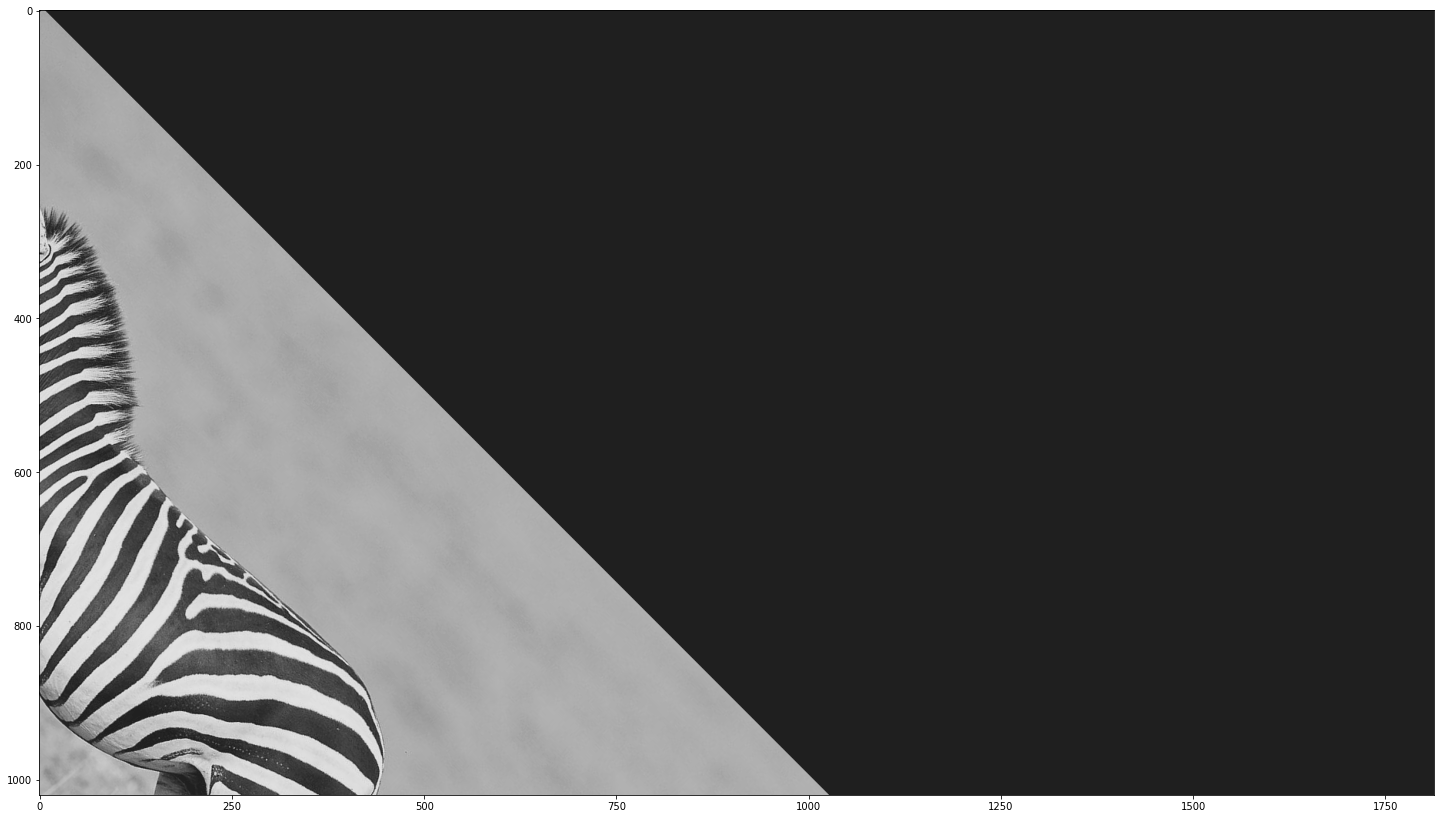

In [147]:
from scipy.ndimage import affine_transform


center = np.array([5,5])
angle = np.pi/4
transform = np.array([[np.cos(angle),-np.sin(angle)],[np.sin(angle),np.cos(angle)]]) # rotazione

offset = (center-center.dot(transform)).dot(np.linalg.inv(transform)) # centraggio

res = affine_transform(zebra,transform,order=2,offset=-offset)
    
plt.imshow(res)

print(res.shape)

# Manca la parte di traslazione per mancanza di tempo